[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1zTdWPOzHRpswD_Lwh8a6ih4kYw7x07lw#scrollTo=0AMIzfKS_Fq7)

In [ ]:
# Mollusk Classifier is taken as an example, you can change everything so that it classifies anything you prefer

In [ ]:
!pip install -Uqq fastai
from fastai.vision.all import *
#it is still there implicitly, but I want to add this package explicitly
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy.io import loadmat # to be able to load data from .mat extenstion files

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.7/232.7 kB 3.7 MB/s eta 0:00:00


In [ ]:
python --version

In [ ]:
pip list

In [ ]:
# Check image datasets in URLs
URLs.FLOWERS

In [2]:
# Extract image datasets to explore them below
foodPath = untar_data(URLs.FOOD)
#dogPath = untar_data(URLs.IMAGEWOOF)
#flowerPath = untar_data(URLs.FLOWERS)
#carsPath = untar_data(URLs.CARS)

In [ ]:
# Gets output of images with their paths
#get_image_files(foodPath)
#get_image_files(dogPath)
#get_image_files(flowerPath)
get_image_files(carsPath)


In [6]:
# Prints files in directory
get_files(foodPath)

(#3017) [Path('/root/.fastai/data/food-101/train.json'),Path('/root/.fastai/data/food-101/test.txt'),Path('/root/.fastai/data/food-101/classes.txt'),Path('/root/.fastai/data/food-101/labels.txt'),Path('/root/.fastai/data/food-101/train.txt'),Path('/root/.fastai/data/food-101/test.json'),Path('/root/.fastai/data/food-101/images/scallops/scallops_2204159.jpg'),Path('/root/.fastai/data/food-101/images/scallops/scallops_1479757.jpg'),Path('/root/.fastai/data/food-101/images/scallops/scallops_2428938.jpg'),Path('/root/.fastai/data/food-101/images/scallops/scallops_1414028.jpg')...]

In [ ]:
# simple function to show as many pictures of the dataset as needed
def show_images(n):
  for img in get_image_files(foodPath):
    if n<0:
      break
    image = PILImage.create(img)
    image.show()
    n -= 1


show_images(100)




In [ ]:
# The size of dataset units, number of images
len(get_image_files(flowerPath))


In [ ]:
#Convert .mat to array
data = loadmat('/root/.fastai/data/stanford-cars/cars_annos.mat')
data

In [ ]:
ls

In [ ]:
#print out test data using pandas
df = pd.read_json('/root/.fastai/data/food-101/train.json')
df

In [ ]:
# Explore individual columns
df['scallops']
df['oysters']
df['mussels']


In [ ]:
#print out train data using pandas
#pd.read_json('/root/.fastai/data/food-101/train.json')
pd.read_json('/root/.fastai/data/food-101/test.json')

In [4]:
# Decide how many classes of foods you want to classify
labelA = 'mussels'
labelB = 'oysters'
labelC = 'scallops'

In [ ]:
# Data preparation(cleaning up, removing, etc) with regard to above classes (types) of labels
# Remove all images that dont have labels defined above
# Rename images with defined labels to have according label in their filename respectively
def clean_data():
  # Loop through all downloaded images
  for img in get_image_files(foodPath):
    # rename images according to predefined labels
    if labelA in str(img):
      img.rename(f"{img.parent}/{labelA}_{img.name}")
    elif labelB in str(img):
      img.rename(f"{img.parent}/{labelB}_{img.name}")
    elif labelC in str(img):
      img.rename(f"{img.parent}/{labelC}_{img.name}")
    else: os.remove(img)

  print(len(get_image_files(foodPath)))
clean_data()

In [ ]:
# This one needs to be fixed ***WARNING***
# Good alternative way to store original data, requires additional bug fixing
# Data preparation(cleaning up, removing, etc) with regard to above classes (types) of labels
# Remove all images that dont have labels defined above
# Rename images with defined labels to have according label in their filename respectively
def clean_dataset_data():
  # Loop through all downloaded images
  for index in range(len(dataset)):
    # rename images according to predefined labels
    current_image = dataset[index]
    if labelA in str(current_image):
      current_image.rename(f"{current_image.parent}/{labelA}_{current_image.name}")
    elif labelB in str(current_image):
      current_image.rename(f"{current_image.parent}/{labelB}_{current_image.name}")
    else: del dataset[index]

  print(len(dataset))
clean_dataset_data()

In [ ]:
def GetLabel(file_name):
  return file_name.split('_')[0]

GetLabel("scallops_1479757")

image = PILImage.create(get_image_files(foodPath)[1000])
image.show()

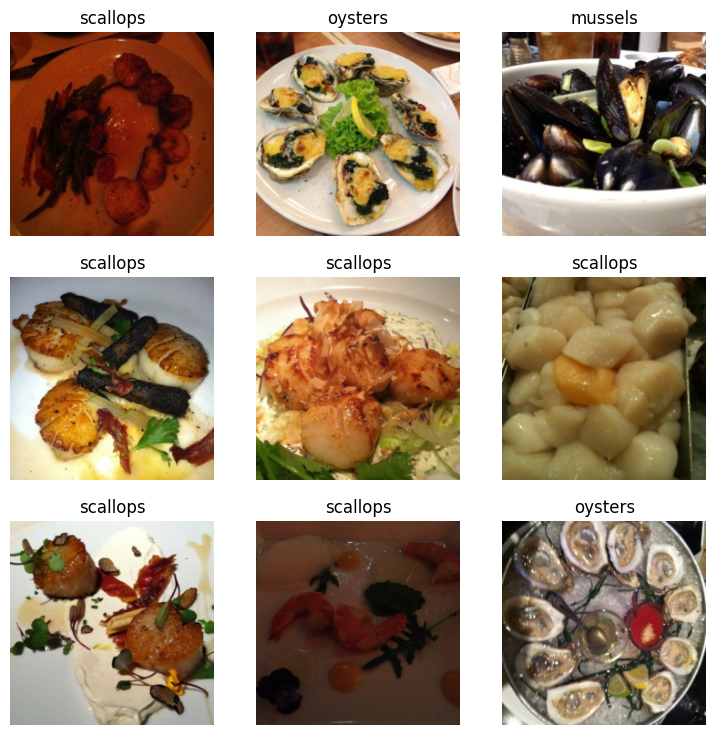

In [ ]:
dls = ImageDataLoaders.from_name_func(foodPath, get_image_files(foodPath), valid_pct=0.2, seef=420, label_func=GetLabel, item_tfms=Resize(224))

dls.valid.show_batch()

In [ ]:
# Here we will implement a Transfer Learning technique, taking 'resnet34' model
# And then adding our model on top of it which is highly effective
# resnet34 was trained on a huge amount of data points\sets
learn = cnn_learner(dls, resnet34, metrics=error_rate, pretrained=True)
learn.fine_tune(epochs=10)

Saving загружено (3).png to загружено (3).png


This is a oysters.
mussels 0.000001
oysters 0.999999
scallops 0.000000


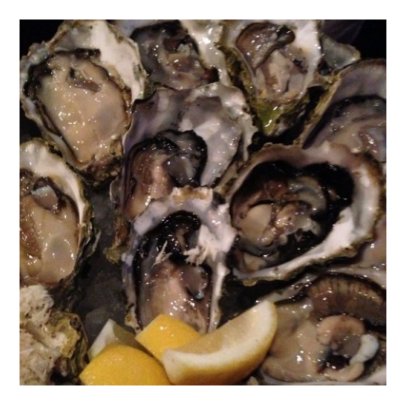

In [ ]:
# Verify Model
# you can upload your own images

from google.colab import files
uploader = files.upload()

for img in uploader.items():
  uploadedImg = img[0]
  img = PILImage.create(uploadedImg)
  img.show()

  label,_,probs = learn.predict(img)

  print(f"This is a {label}.")
  print(f"{labelA} {probs[2].item():.6f}")
  print(f"{labelB} {probs[1].item():.6f}")
  print(f"{labelC} {probs[0].item():.6f}")

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


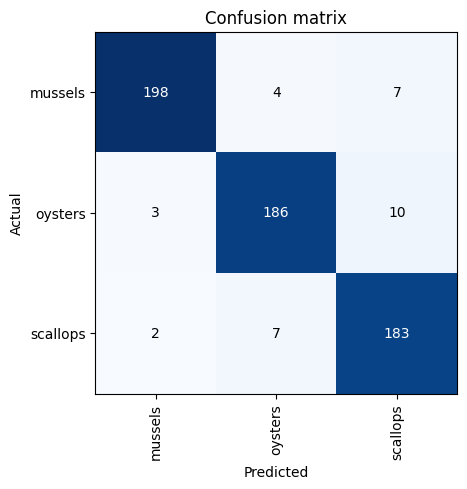

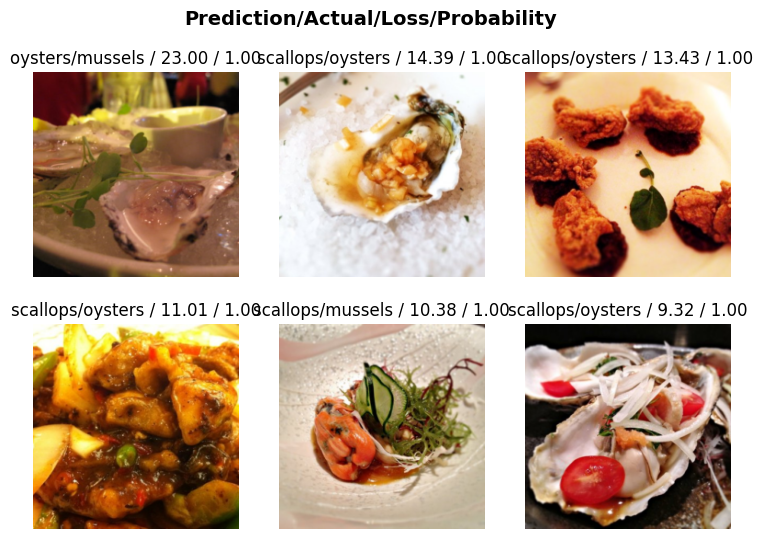

In [ ]:
# Confusion matrix (optional), edge cases where our model has problems identifying

interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()
interp.plot_top_losses(6)

In [ ]:
# Deployment of the project
learn.export() # exports model as export.pkl by default

In [ ]:
# let's grab the first pkl file we find
modelPath = get_files(foodPath, '.pkl')[0]
modelPath

Path('/root/.fastai/data/food-101/export.pkl')

In [ ]:
learn_inf = load_learner(modelPath)
learn_inf.predict(plt.imread(get_image_files(foodPath)[0])) # raw prediction

('scallops', tensor(2), tensor([4.6156e-05, 7.6506e-08, 9.9995e-01]))

In [ ]:
learn_inf.dls.vocab #Get the labels

['mussels', 'oysters', 'scallops']

In [ ]:
from google.colab import files
files.download(modelPath)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>